# Simple linear regression

We have real estate dataset. 

Real estate data almost always has a certain causal relationship.

The data is located in the file: 'real_estate_price_size.csv'. 

Our aim is to perform a simple linear regression using the new data.

Dependent variable:'price'
Independent variables:'size'
Logic: Price of the property is proportional to the size of the property. 


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm      # This is the library we will use while running regressions. 
# Impart a pretty skin to matplotlib charts
import seaborn as sns
sns.set()                         # Overrides the default matplotlib stye

## Load the data

In [2]:
df = pd.read_csv('real_estate_price_size.csv')    # Returns a data frame

In [3]:
print(df)

         price     size
0   234314.144   643.09
1   228581.528   656.22
2   281626.336   487.29
3   401255.608  1504.75
4   458674.256  1275.46
5   245050.280   575.19
6   265129.064   570.89
7   175716.480   620.82
8   331101.344   682.26
9   218630.608   694.52
10  279555.096  1060.36
11  494778.992  1842.51
12  215472.104   694.52
13  418753.008  1009.25
14  444192.008  1300.96
15  440201.616  1379.72
16  248337.600   690.54
17  234178.160   623.94
18  225451.984   681.07
19  299416.976  1027.76
20  268125.080   620.71
21  171795.240   549.69
22  412569.472  1207.45
23  183459.488   518.38
24  168047.264   525.81
25  362519.720  1103.30
26  271793.312   570.89
27  406852.304  1334.10
28  297760.440   681.07
29  368988.432  1496.36
..         ...      ...
70  276875.632  1021.95
71  181587.576   643.41
72  298926.496   656.22
73  211724.096   549.80
74  228313.024   685.48
75  286161.600   685.48
76  382120.152  1183.46
77  365863.936  1334.10
78  251560.040   682.26
79  342988.456  

In [6]:
# Print descriptive statistics
# Interpretation: Sample consists a total of 100 readings
print(df.describe())

               price         size
count     100.000000   100.000000
mean   292289.470160   853.024200
std     77051.727525   297.941951
min    154282.128000   479.750000
25%    234280.148000   643.330000
50%    280590.716000   696.405000
75%    335723.696000  1029.322500
max    500681.128000  1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [7]:
# Remember the Linear regression equation: [ y_hat = beta0 + beta1.x1 ]
y = df.price       # Dependent Variable..One way to access the column
x1 = df['size']    # Independent variable...Another way to access the column. NOTE: 'size' is a pandas keyword


### Explore the data

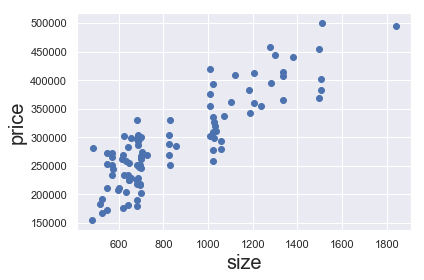

In [8]:
# Good Practice to plot the data and visualize the relationship
plt.scatter(x1, y)
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()

# We observe a strong positive relationship in between the size of the house and its price. 

### Regression itself

In [9]:
# Note: We will use the library statsmodels to perform Linear regression. 
# General simple regression equation: y_hat = beta0 + beta1.x1
# By default, the statsmodels method: statsmodels.regression.linear_model.OLS does not include the INTERCEPT beta0. 
# We have to explicitly manually add one if required. 
# 'statsmodels' however provides a convenience function called 'add_constant()' that adds a constant column to input dataset.

x = sm.add_constant(x1)                                                    # Add a constant column to input dataset
results = sm.OLS(y,x).fit()                                                # Perform the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 01 Jan 2019   Prob (F-statistic):           8.13e-31
Time:                        11:00:25   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.0

### Plot the regression line on the initial scatter

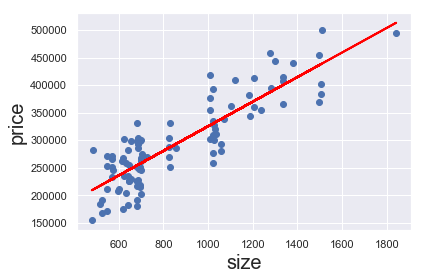

In [10]:
plt.scatter(x1,y)
y_hat = 1.019e+05 + 223.1787*x1      # Construct the regression equation from the OLS results obtained above
fig = plt.plot(x1, y_hat, lw = 2, c = 'red', label = 'Line of Best Fit')
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()
